In [1]:
import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt

In [2]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [3]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [4]:
ocr_url = vision_base_url + 'ocr'

In [17]:
image_url = 'https://images.unsplash.com/photo-1641673840250-2843679337f3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTUxfHx3b3JkfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=400&q=60'

In [18]:
img = Image.open(BytesIO(requests.get(image_url).content))

In [19]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'language': 'unk', 'detectOrientation': 'true'}
data    = {'url': image_url}

In [20]:
response = requests.post(ocr_url,
                        headers=headers,
                        params=params,
                        json=data)

In [21]:
analysis = response.json()

In [22]:
analysis

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '10,81,371,255',
   'lines': [{'boundingBox': '51,81,294,40',
     'words': [{'boundingBox': '51,81,122,39', 'text': 'YOU'},
      {'boundingBox': '224,82,121,39', 'text': 'ARE'}]},
    {'boundingBox': '10,191,359,39',
     'words': [{'boundingBox': '10,191,175,38', 'text': 'WHAT'},
      {'boundingBox': '246,191,123,39', 'text': 'YOU'}]},
    {'boundingBox': '20,298,361,38',
     'words': [{'boundingBox': '20,298,361,38', 'text': 'MANIFEST'}]}]}]}

In [23]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '51,81,122,39', 'text': 'YOU'},
 {'boundingBox': '224,82,121,39', 'text': 'ARE'},
 {'boundingBox': '10,191,175,38', 'text': 'WHAT'},
 {'boundingBox': '246,191,123,39', 'text': 'YOU'},
 {'boundingBox': '20,298,361,38', 'text': 'MANIFEST'}]

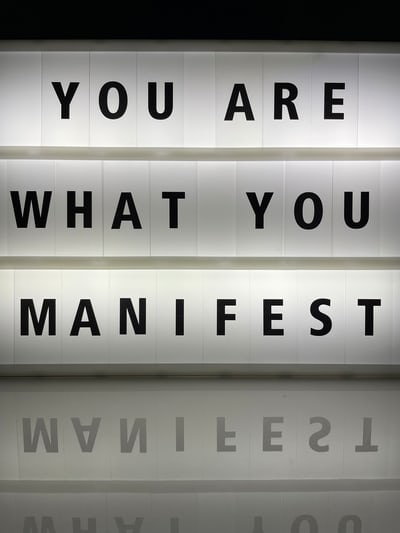

In [24]:
img